In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


In [10]:
# Total population, N.
N = 328.5*10**6
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 246, 0

# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
D0 = 0 #no death at t0

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 2.4/11, 1./11 #multiplied by 36 
print("R_0 =", beta/gamma)

#mortality rate
m = 3./100

#Nb days of simulation
D = 300
time = np.linspace(0, D, D)

#Hospital_capacity
beds = 844
resp = 777

#Quarantine: isolation of symptomatic people
StartQ = 100 #how many days after 
Quarantine = {"no":0, "yes":0.75} #yes: percentage of sick people showing symptoms
Q = Quarantine["no"]

R_0 = 2.4


In [11]:
#initialize data to plot
S_array = np.ones(D)*S0
I_array = np.ones(D)*I0
R_array = np.ones(D)*R0
De_array = np.zeros(D)
Severe   = np.zeros(D)
Critical = np.zeros(D)


# The SIRD model differential equations.
def deriv(y, t, N, beta, gamma, day): 
    S, I, R, De = y
   
    #risk people
    Severe[day]    = I* 0.15 #require hosp
    Critical[day]  = I* 0.05 #require resp
    
    #quarantined people
    q=0
    if day >= StartQ:
        q = I*Q
    
    #check hospital capacity
    if Critical[day] > resp:
        m_r = 2.5*m
    elif Severe[day]+Critical[i] > beds: 
        m_r = 2*m
    else: m_r = m
    
    #diff eq
    dSdt = -beta * S * (I-q) / N
    dIdt = beta * S * (I-q) / N - gamma * I
    dRdt = (1-m_r)*gamma * I
    dDedt = gamma*m_r*I
    
    return dSdt, dIdt, dRdt, dDedt

# Initial conditions vector
t=[0,1]
y0 = S0, I0, R0, D0

# Integrate the SIRD equations over the time grid, t.
for i in range(1,D):
    ret = odeint(deriv, y0, t, args=(N, beta, gamma, i))
    
    S, I, R, De = ret.T
    
    S_array[i]   = S[1]
    I_array[i]   = I[1]
    R_array[i]   = R[1]
    De_array[i]  = De[1]
    y0 = S[1], I[1], R[1], De[1]

#get total death and infected
Tot_death = De_array[len(De_array)-1]
Percentage_death = Tot_death/N*100
Tot_infected = R_array[len(R_array)-1]
Percentage_infected = Tot_infected/N*100


Death:  21645601.69561093
% Death:  6.5892242604599485
Infected:  266971548.1341065
% infected 81.26987766639468


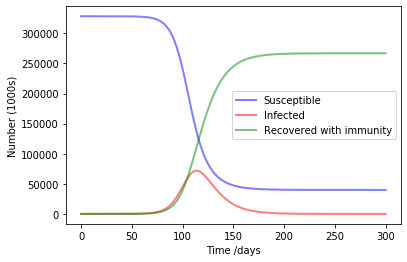

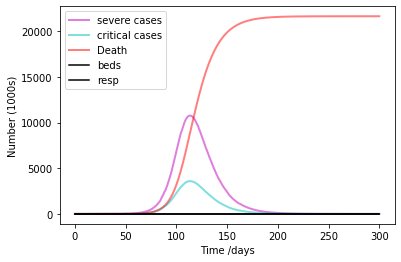

In [12]:

# Plot the data 
print("Death: ", Tot_death)
print("% Death: ", Percentage_death)
print("Infected: ", Tot_infected)
print("% infected", Percentage_infected)

fig = plt.figure(facecolor='w')
plt.plot(time, S_array/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
plt.plot(time, I_array/1000, 'r', alpha=0.5, lw=2, label='Infected')
plt.plot(time, R_array/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
plt.xlabel('Time /days')
plt.ylabel('Number (1000s)')
legend = plt.legend()


fig = plt.figure(facecolor='w')
plt.plot(time, Severe/1000,  'm', alpha=0.5, lw=2, label='severe cases')
plt.plot(time, Critical/1000, 'c', alpha=0.5, lw=2, label='critical cases')
plt.plot(time, De_array/1000, 'r', alpha=0.5, lw=2, label='Death')


plt.plot([0,D], [beds/1000, beds/1000], 'k', label='beds')
plt.plot([0,D], [resp/1000, resp/1000],'k', label='resp')


plt.xlabel('Time /days')
plt.ylabel('Number (1000s)')
legend = plt.legend()

plt.show()